#Introduction
This assignment was completed by Anthony Johansen. My student ID number is 260712168. 

#Thresholding (Code)

<function matplotlib.pyplot.show>

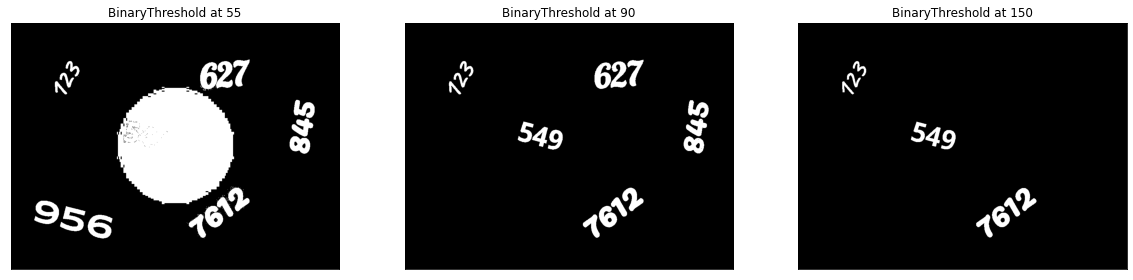

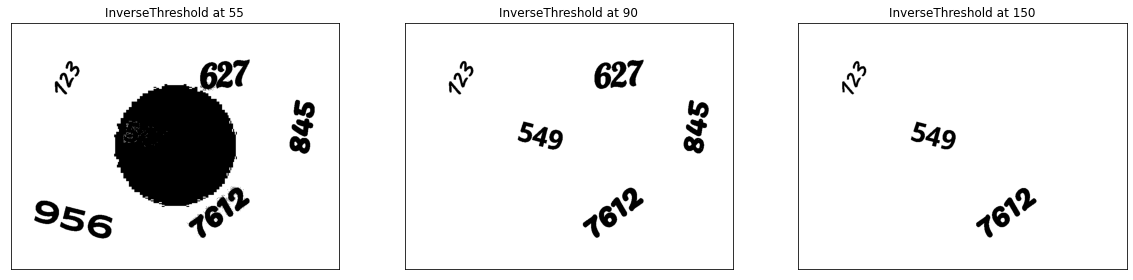

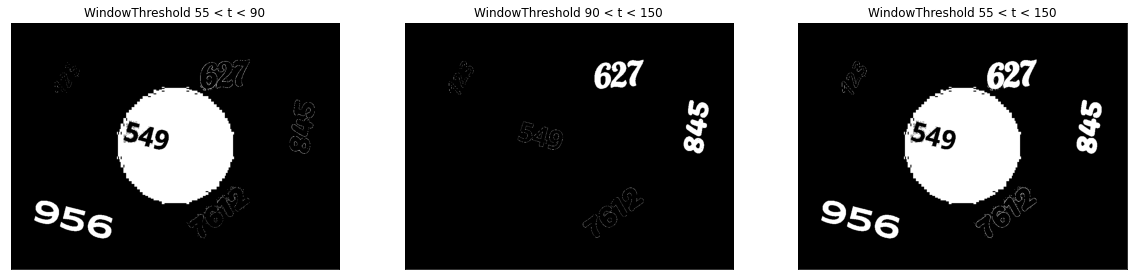

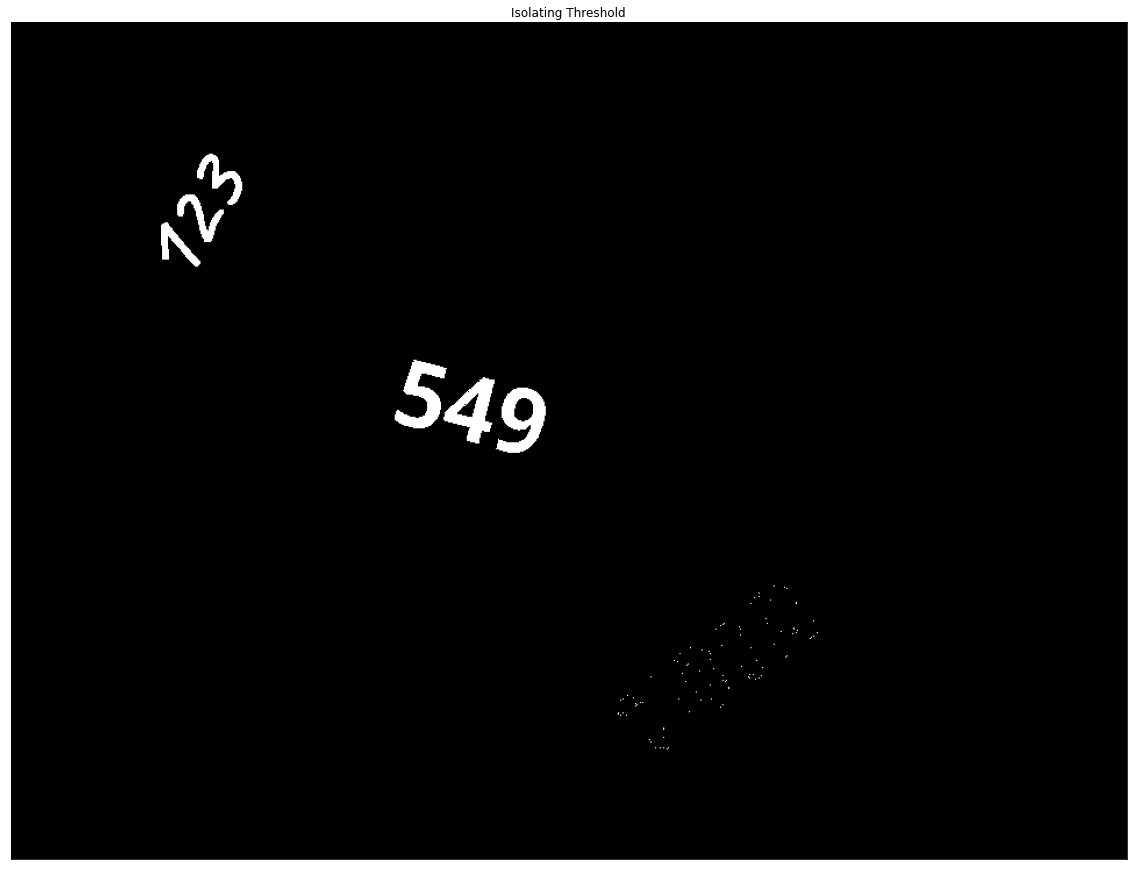

In [ ]:
# Calling libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

#Load Image & get height/width (We assume they are in same directory as the code)
imageColor = cv2.imread("numbers.jpg")
imgGray = cv2.cvtColor(imageColor, cv2.COLOR_BGR2GRAY)
height, width = imgGray.shape

#Thresholds
thresh1 = 55
thresh2 = 90
thresh3 = 150

#Create placeholders for the 9 new images we will be creating
img_simpleThresh1 = np.zeros((height, width), dtype=np.uint8)
img_simpleThresh2 = np.zeros((height, width), dtype=np.uint8)
img_simpleThresh3 = np.zeros((height, width), dtype=np.uint8)
img_inverseThresh1 = np.zeros((height, width), dtype=np.uint8)
img_inverseThresh2 = np.zeros((height, width), dtype=np.uint8)
img_inverseThresh3 = np.zeros((height, width), dtype=np.uint8)
img_windowThresh1 = np.zeros((height, width), dtype=np.uint8)
img_windowThresh2 = np.zeros((height, width), dtype=np.uint8)
img_windowThresh3 = np.zeros((height, width), dtype=np.uint8)
img_isolateThresh = np.zeros((height,width), dtype=np.uint8)

#Perform binary Thresholding
for row in range(0, height):
    for col in range(0, width):
        if imgGray[row,col] > thresh1:
            img_simpleThresh1[row, col] = 255
        else:
            img_simpleThresh1[row, col] = 0

for row in range(0, height):
    for col in range(0, width):
        if imgGray[row,col] > thresh2:
            img_simpleThresh2[row, col] = 255
        else:
            img_simpleThresh2[row, col] = 0

for row in range(0, height):
    for col in range(0, width):
        if imgGray[row,col] > thresh3:
            img_simpleThresh3[row, col] = 255
        else:
            img_simpleThresh3[row, col] = 0

#Perform inverse binary thresholding
for row in range(0, height):
    for col in range(0, width):
        if imgGray[row,col] < thresh1:
            img_inverseThresh1[row, col] = 255
        else:
            img_inverseThresh1[row, col] = 0

for row in range(0, height):
    for col in range(0, width):
        if imgGray[row,col] < thresh2:
            img_inverseThresh2[row, col] = 255
        else:
            img_inverseThresh2[row, col] = 0

for row in range(0, height):
    for col in range(0, width):
        if imgGray[row,col] < thresh3:
            img_inverseThresh3[row, col] = 255
        else:
            img_inverseThresh3[row, col] = 0

#Perform window binary thresholding
for row in range(0, height):
    for col in range(0, width):
        if thresh2 > imgGray[row,col] > thresh1:
            img_windowThresh1[row, col] = 255
        else:
            img_windowThresh1[row, col] = 0

for row in range(0, height):
    for col in range(0, width):
        if thresh3 > imgGray[row,col] > thresh2:
            img_windowThresh2[row, col] = 255
        else:
            img_windowThresh2[row, col] = 0

for row in range(0, height):
    for col in range(0, width):
        if thresh3 > imgGray[row,col] > thresh1:
            img_windowThresh3[row, col] = 255
        else:
            img_windowThresh3[row, col] = 0

#Isolate 123 and 549 such that they have pixel values 255
for row in range(0, height):
    for col in range(0, width):
        if imgGray[row,col] > 195:
            img_isolateThresh[row, col] = 255
        else:
            img_isolateThresh[row, col] = 0

#Print images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img_simpleThresh1, cmap="gray")
plt.title("BinaryThreshold at 55"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_simpleThresh2, cmap="gray")
plt.title("BinaryThreshold at 90"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_simpleThresh3, cmap="gray")
plt.title("BinaryThreshold at 150"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img_inverseThresh1, cmap="gray")
plt.title("InverseThreshold at 55"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_inverseThresh2, cmap="gray")
plt.title("InverseThreshold at 90"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_inverseThresh3, cmap="gray")
plt.title("InverseThreshold at 150"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img_windowThresh1, cmap="gray")
plt.title("WindowThreshold 55 < t < 90"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_windowThresh2, cmap="gray")
plt.title("WindowThreshold 90 < t < 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_windowThresh3, cmap="gray")
plt.title("WindowThreshold 55 < t < 150"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(111), plt.imshow(img_isolateThresh, cmap = "gray")
plt.title("Isolating Threshold"), plt.xticks([]), plt.yticks([])

plt.show


#Thresholding(Written Response)

####How many and which numbers are segmented at each threshold? (A number is considered as segmented if all digits of that number are considered as foreground in the thresholded image) What else do you observe at each threshold?

**For the binary threshold:**

At t = 55 we can see [123, 956, 627, 7612, 845]. 

At t = 90 we can see [123, 549, 627, 7612, 845]. 

At t = 150 we can see [123, 549, 7612].

We also notice a large white circle in the middle of the image at t= 55 where the beginning of 549 is barely visible. The pixels in that area (except for the pixels at 549) must have an intensity between 55 and 90 because the circle is not visible when t = 90. The reason we do not see 549 in the image where t = 55 is because the pixels around it are also white, so we cannot easily view the number. 

**For the inverse binary threshold:**

At t = 55 we can see [123, 956, 627, 7612, 845].

At t = 90 we can see [123, 549, 627, 7612, 845].

At t = 150 we can see [123, 549, 7612].

We notice the same circle in the image at t = 55 for the same reasons as listed above (pixels in that region are not less than 55, but they are less than 90).

---





####Threshold the image using Window binary thresholding using three different range of thresholds. Write your observations. How many and which numbers are segmented at each threshold?

With t1 = 90 and t2 = 55 we can see [956, 549]
With t1 = 150 and t2 = 90 we can see [627, 845]
With t1 = 150 and t2 = 55 we can see [956, 549, 627, 845]

We observe that while 549 is visible in the images, this is only because the area surrounding it was set to 255 (white). Normally we would not be able to see 549 because its pixel value was set to 0, however since its surroundings are white we are able to see it. It is the only number with black pixels, all the other numbers were represented with white pxiels. 

---



####Find a threshold value such that only numbers ”123” and ”549” are segmented (i.e. considered as foreground - white pixel - 255 value). See Figure 1(b). Report your finding for at least three different threshold values, and write how it helped you in narrowing down the desired hyper-parameter value

First I re-ran t = 150 and got [123, 549, 7612]. I realized this value was too low since 7612 was still visible, so we ran with t = 220 and got [123]. At this threshold value 549 is just barely visible and 7612 is not visible at all. So I ran t = 200 and got [123, 549]. This is our desired hyper paramater because only 123 and 549 are visible.

#Denoising (Code)

In [ ]:
#Load the 3 images we will be using
imageLighthouse = cv2.imread("lighthouse.png")
imageGLighthouse = cv2.imread("gaussian_lighthouse.png")
imageSPLighthouse = cv2.imread("saltandpepper_lighthouse.png")

imgLighthouseGray = cv2.cvtColor(imageLighthouse, cv2.COLOR_BGR2GRAY)
imgGLighthouseGray = cv2.cvtColor(imageGLighthouse, cv2.COLOR_BGR2GRAY)
imgSPLighthouseGray = cv2.cvtColor(imageSPLighthouse, cv2.COLOR_BGR2GRAY)

#Filter the gaussian noisy image using a 5x5 Gaussian filter with variance equal to 2
#Because the cv2 function takes standard deviation, our input is the square root of the desired variance
filteredImage = cv2.GaussianBlur(imgGLighthouseGray, (5,5), math.sqrt(2))

#Filter the gaussian noisy image using a box filter of the same size
filteredImage2 = cv2.blur(imgGLighthouseGray, (5,5))

#Compare the PSNR of both images to the clean image
psnr1 = cv2.PSNR(imgLighthouseGray, filteredImage)
psnr2 = cv2.PSNR(imgLighthouseGray, filteredImage2)

print("The PSNR between the original and guassian blurred image is: ", psnr1)
print("The PSNR between the original and box filtered image is: ", psnr2)

#Filter the salt and pepper noisy image using the gaussian filter as before
filteredImage3 = cv2.GaussianBlur(imgSPLighthouseGray, (5,5), math.sqrt(2))

#Filter the salt and pepper noisy image using a median filter of the same size
filteredImage4 = cv2.medianBlur(imgSPLighthouseGray, 5)

#Compare the PSNR of both images to the clean image
psnr3 = cv2.PSNR(imgLighthouseGray, filteredImage3)
psnr4 = cv2.PSNR(imgLighthouseGray, filteredImage4)

print()
print("The PSNR between the original and guassian blurred image is: ", psnr3)
print("The PSNR between the original and median filtered image is: ", psnr4)

The PSNR between the original and guassian blurred image is:  26.740281647948976
The PSNR between the original and box filtered image is:  25.300013564257455

The PSNR between the original and guassian blurred image is:  26.30020233930108
The PSNR between the original and median filtered image is:  26.809189025548324


#Denoising (Written Response)

####Compare the PSNR of the original image and the denoised gaussian image

The filter which gave the superior result in this case was the gaussian filter which gave a PSNR of 26.74 compared to the box filter which gave a PSNR of 25.30

---

####Compare the PSNR of the original image and the denoised salt and pepper image

The flter which gave the superior result in this case was the median filter which gave a PSNR of 26.81 compared to the gaussian filter which gave a PSNR of 26.30

#Sobel Edge Detector (Code)

(Text(0.5, 1.0, '3x3 Sobel Edge 20% Threshold'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

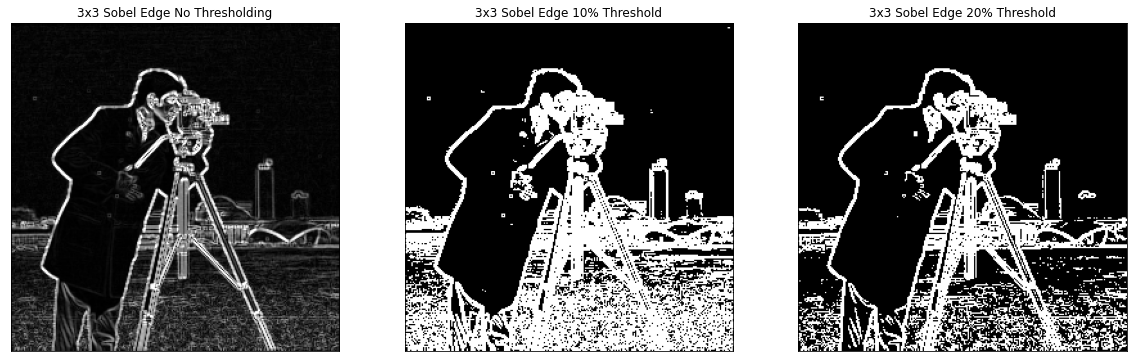

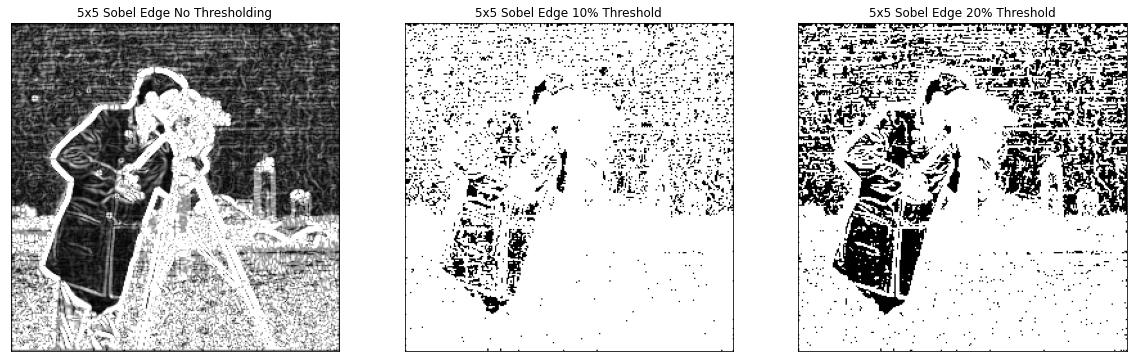

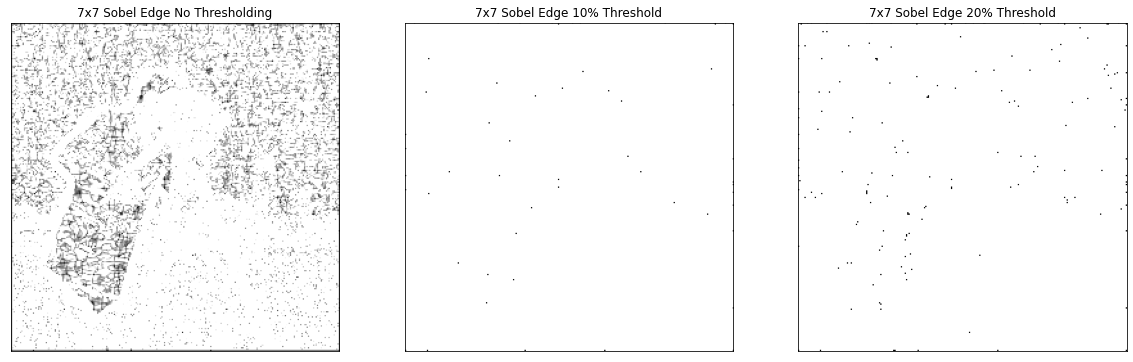

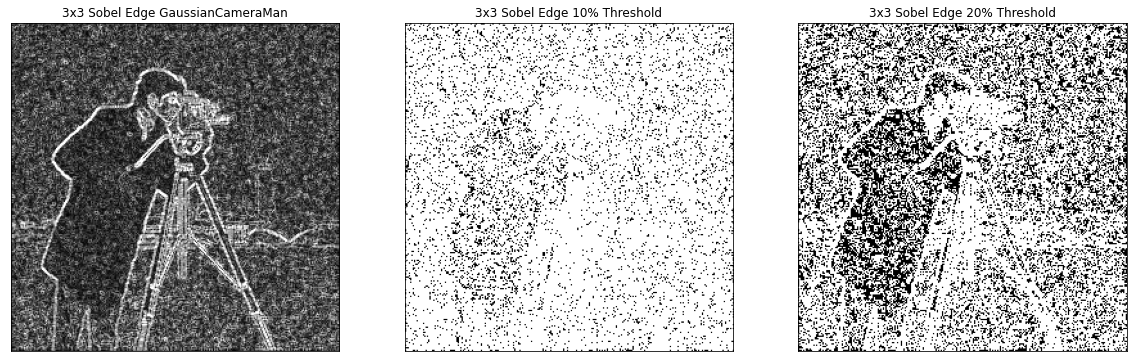

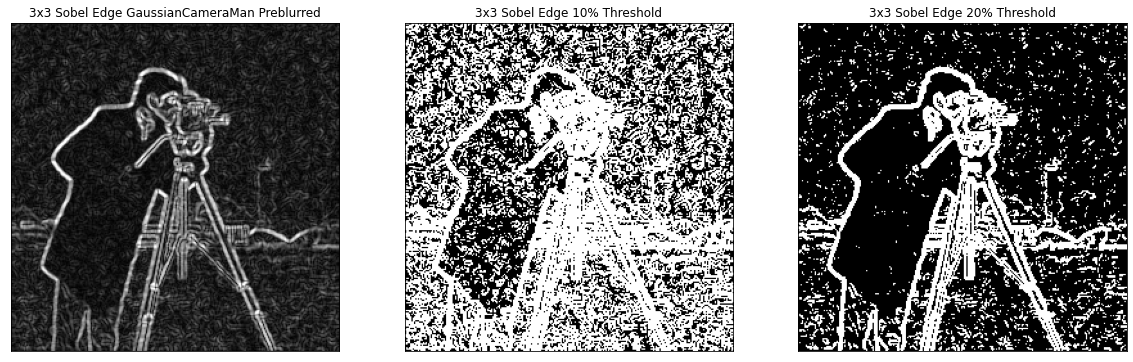

In [ ]:
#Load the images we will use
imageCamera = cv2.imread("cameraman.png")
imageGCamera = cv2.imread("gaussian_cameraman.png")
imageCameraman = cv2.cvtColor(imageCamera, cv2.COLOR_BGR2GRAY)
imageGCameraman = cv2.cvtColor(imageGCamera, cv2.COLOR_BGR2GRAY)


#Apply a sobel edge detector with kernel size 3x3, 5x5, and 7x7 to the image
#3x3
I_x = cv2.Sobel(imageCameraman, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(imageCameraman, cv2.CV_64F, 0, 1, ksize=3)

abs_I_x = cv2.convertScaleAbs(I_x)
abs_I_y = cv2.convertScaleAbs(I_y)

I1 = cv2.addWeighted(abs_I_x, 0.5, abs_I_y, 0.5, 0)

#5x5
I_x = cv2.Sobel(imageCameraman, cv2.CV_64F, 1, 0, ksize=5)
I_y = cv2.Sobel(imageCameraman, cv2.CV_64F, 0, 1, ksize=5)

abs_I_x = cv2.convertScaleAbs(I_x)
abs_I_y = cv2.convertScaleAbs(I_y)

I2 = cv2.addWeighted(abs_I_x, 0.5, abs_I_y, 0.5, 0)

#7x7
I_x = cv2.Sobel(imageCameraman, cv2.CV_64F, 1, 0, ksize=7)
I_y = cv2.Sobel(imageCameraman, cv2.CV_64F, 0, 1, ksize=7)

abs_I_x = cv2.convertScaleAbs(I_x)
abs_I_y = cv2.convertScaleAbs(I_y)

I3 = cv2.addWeighted(abs_I_x, 0.5, abs_I_y, 0.5, 0)

#Perform thresholding on each image, 10% and 20% of max value
Image1MaxValue = I1.max()
Image2MaxValue = I2.max()
Image3MaxValue = I3.max()

ret, I1_thresh10 = cv2.threshold(I1, Image1MaxValue*0.1, 255, cv2.THRESH_BINARY)
ret, I1_thresh20 = cv2.threshold(I1, Image1MaxValue*0.2, 255, cv2.THRESH_BINARY)
ret, I2_thresh10 = cv2.threshold(I2, Image2MaxValue*0.1, 255, cv2.THRESH_BINARY)
ret, I2_thresh20 = cv2.threshold(I2, Image2MaxValue*0.2, 255, cv2.THRESH_BINARY)
ret, I3_thresh10 = cv2.threshold(I3, Image2MaxValue*0.1, 255, cv2.THRESH_BINARY)
ret, I3_thresh20 = cv2.threshold(I3, Image2MaxValue*0.2, 255, cv2.THRESH_BINARY)

#Print the images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(I1, cmap="gray")
plt.title("3x3 Sobel Edge No Thresholding"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I1_thresh10, cmap="gray")
plt.title("3x3 Sobel Edge 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I1_thresh20, cmap="gray")
plt.title("3x3 Sobel Edge 20% Threshold"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(I2, cmap="gray")
plt.title("5x5 Sobel Edge No Thresholding"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I2_thresh10, cmap="gray")
plt.title("5x5 Sobel Edge 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I2_thresh20, cmap="gray")
plt.title("5x5 Sobel Edge 20% Threshold"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(I3, cmap="gray")
plt.title("7x7 Sobel Edge No Thresholding"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I3_thresh10, cmap="gray")
plt.title("7x7 Sobel Edge 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I3_thresh20, cmap="gray")
plt.title("7x7 Sobel Edge 20% Threshold"), plt.xticks([]), plt.yticks([])

#We will now be doing the second part on the noisy image (without box filter)
I_x = cv2.Sobel(imageGCameraman, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(imageGCameraman, cv2.CV_64F, 0, 1, ksize=3)

abs_I_x = cv2.convertScaleAbs(I_x)
abs_I_y = cv2.convertScaleAbs(I_y)

NI_1 = cv2.addWeighted(abs_I_x, 0.5, abs_I_y, 0.5, 0)

NoisyImageMaxValue = NI_1.max()

ret, NI1_thresh10 = cv2.threshold(NI_1, NoisyImageMaxValue*0.1, 255, cv2.THRESH_BINARY)
ret, NI1_thresh20 = cv2.threshold(NI_1, NoisyImageMaxValue*0.2, 255, cv2.THRESH_BINARY)

#Same as above but apply the 3x3 box filter first
blurredCamera = cv2.blur(imageGCameraman, (3,3))
I_x = cv2.Sobel(blurredCamera, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(blurredCamera, cv2.CV_64F, 0, 1, ksize=3)

abs_I_x = cv2.convertScaleAbs(I_x)
abs_I_y = cv2.convertScaleAbs(I_y)

NI_preblurred = cv2.addWeighted(abs_I_x, 0.5, abs_I_y, 0.5, 0)

preBlurredNoisyImageMaxValue = NI_preblurred.max()

ret, preBlurredNI_thresh10 = cv2.threshold(NI_preblurred, preBlurredNoisyImageMaxValue*0.1, 255, cv2.THRESH_BINARY)
ret, preBlurredNI_thresh20 = cv2.threshold(NI_preblurred, preBlurredNoisyImageMaxValue*0.2, 255, cv2.THRESH_BINARY)

#Print the new images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(NI_1, cmap="gray")
plt.title("3x3 Sobel Edge GaussianCameraMan"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(NI1_thresh10, cmap="gray")
plt.title("3x3 Sobel Edge 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(NI1_thresh20, cmap="gray")
plt.title("3x3 Sobel Edge 20% Threshold"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(NI_preblurred, cmap="gray")
plt.title("3x3 Sobel Edge GaussianCameraMan Preblurred"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(preBlurredNI_thresh10, cmap="gray")
plt.title("3x3 Sobel Edge 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(preBlurredNI_thresh20, cmap="gray")
plt.title("3x3 Sobel Edge 20% Threshold"), plt.xticks([]), plt.yticks([])

#Sobel Edge Detector (Written Response)

####Comment on the effect of filter size on the output

Through our testing it became apparent that larger filters captured less of the edges. The 3x3 filter was the best filter to use in terms of end result edge detection. 

---

####Comment on the effectiveness of using denoising prior to edge detection

The denoising greatly reduced the number of fake edges caught by the 3x3 sobel filter. If we do not denoise a lot of the noise carries over into our edge detector which lead to erreneous edges being detected. Denoising prior to edge detection greatly improved the result of the edge detector.

#Canny Edge Detection (Code)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:110: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

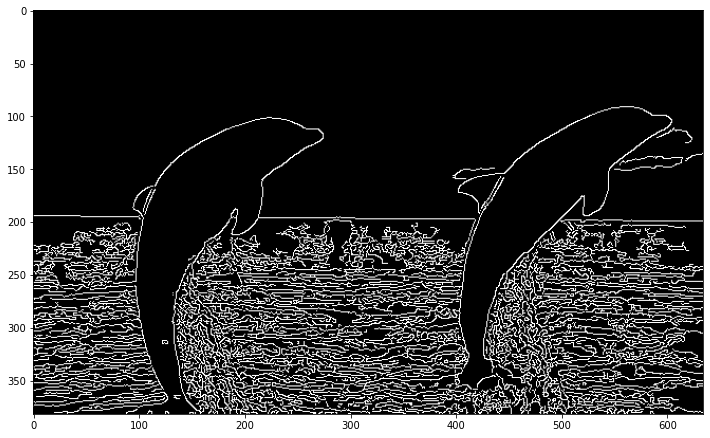

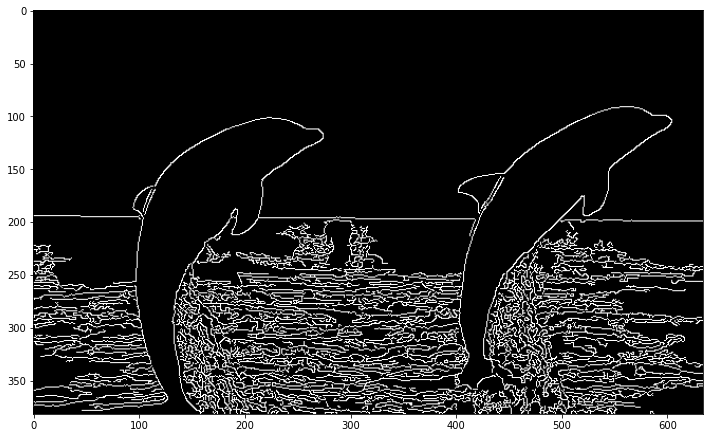

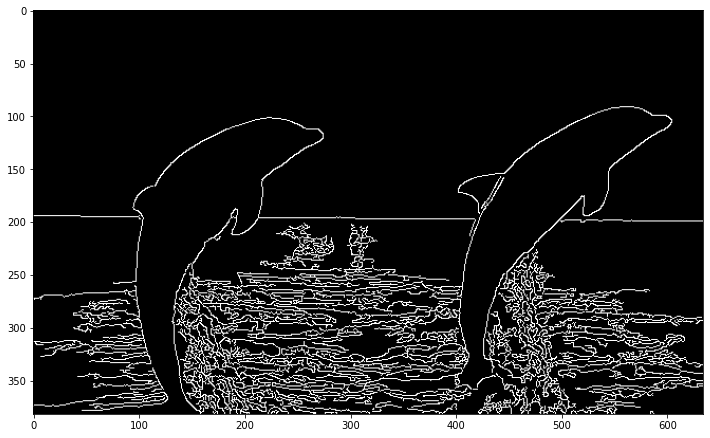

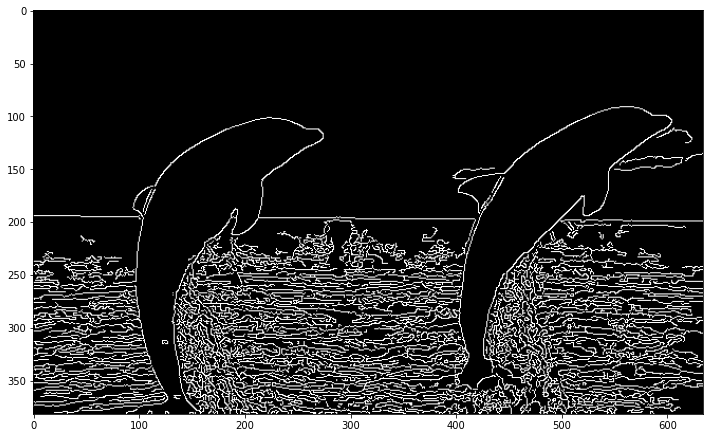

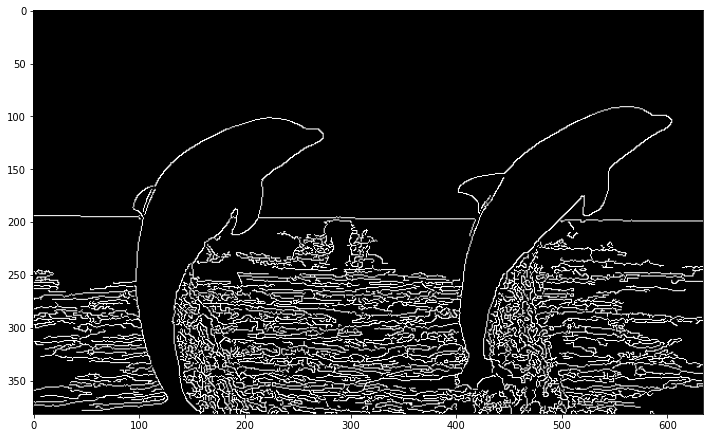

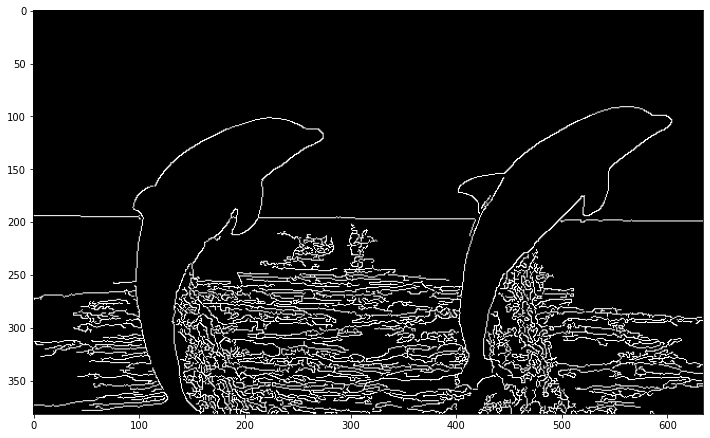

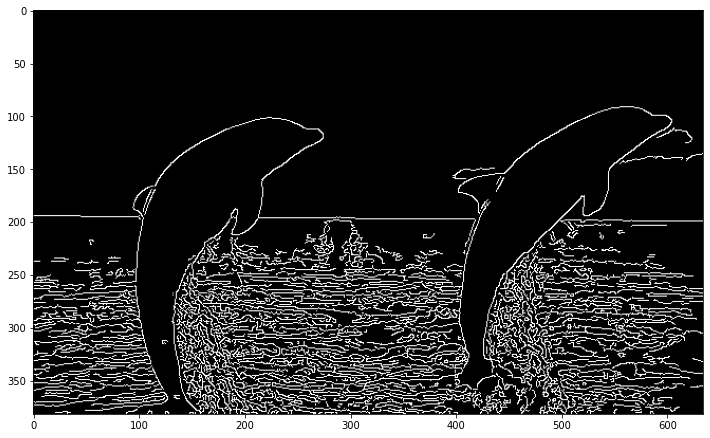

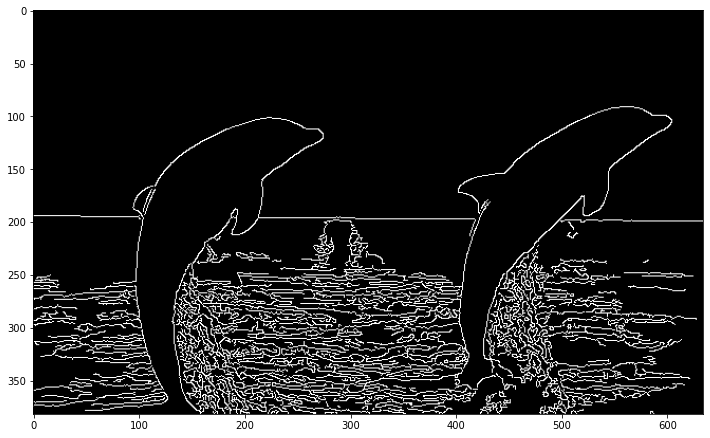

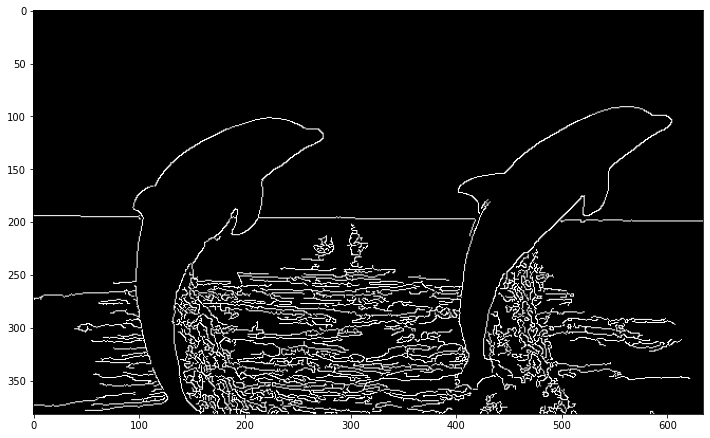

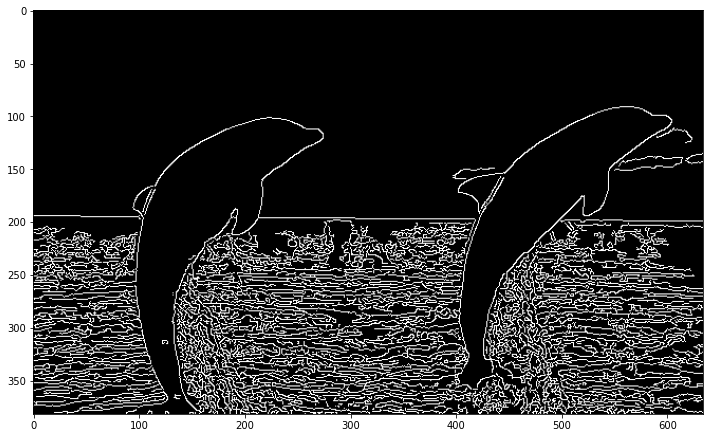

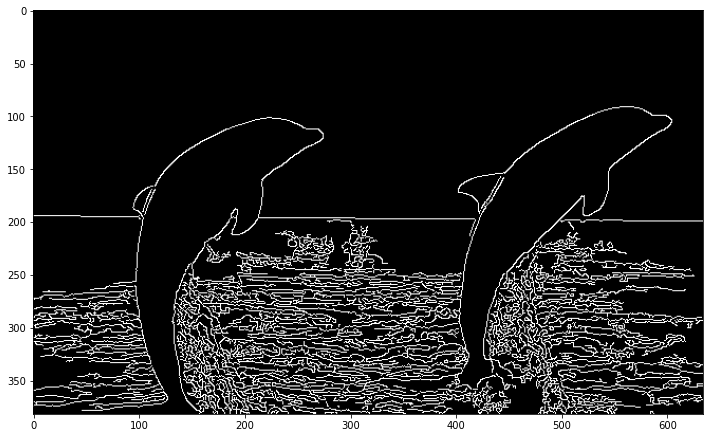

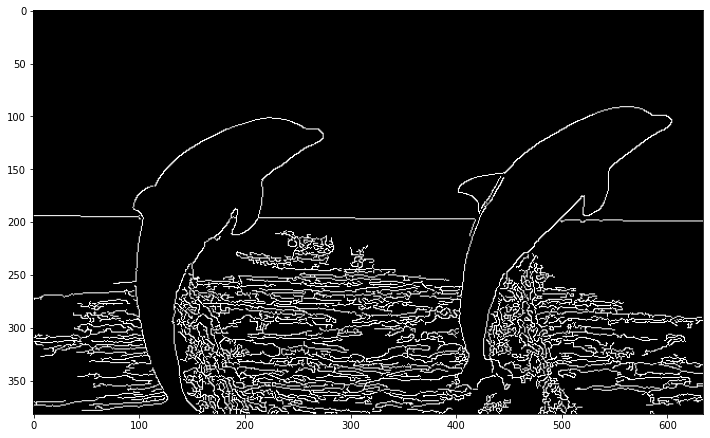

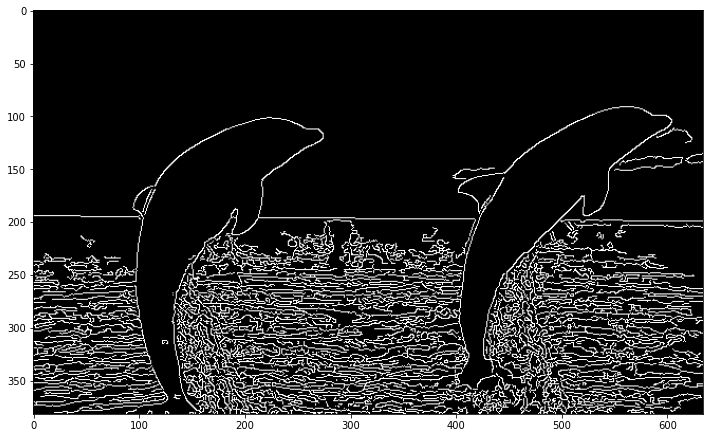

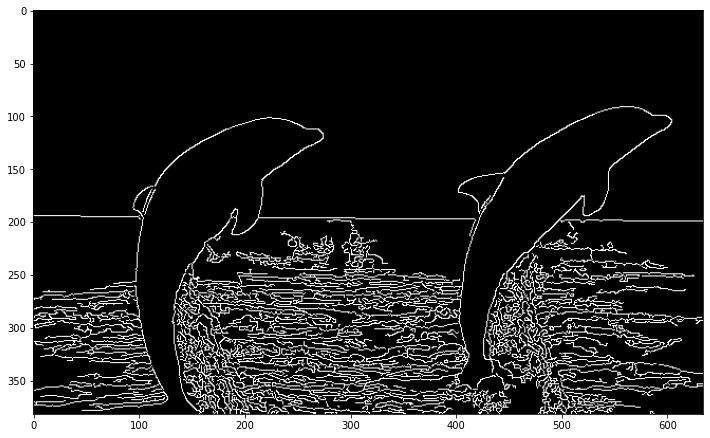

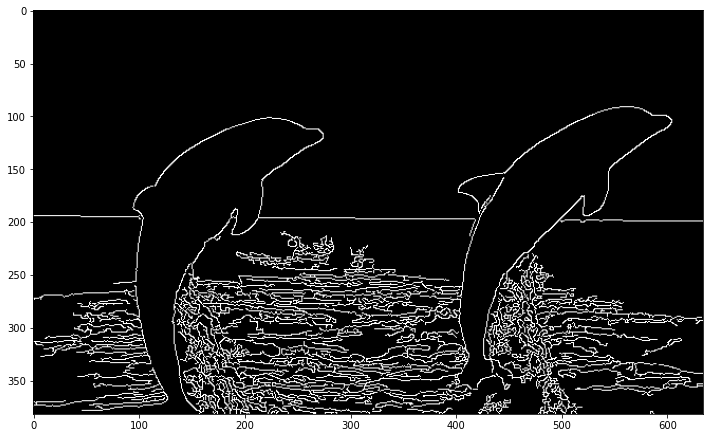

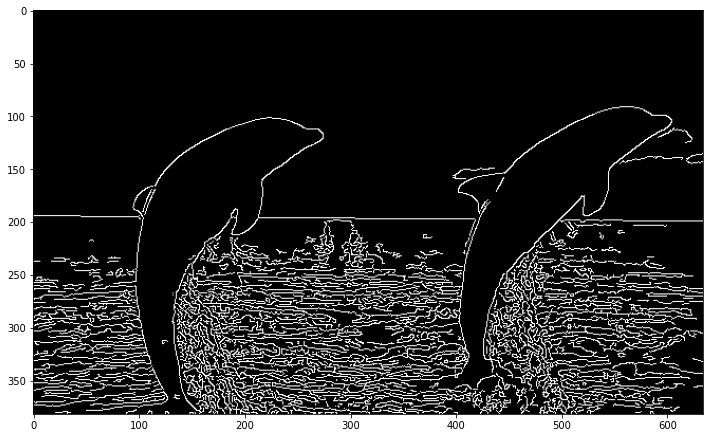

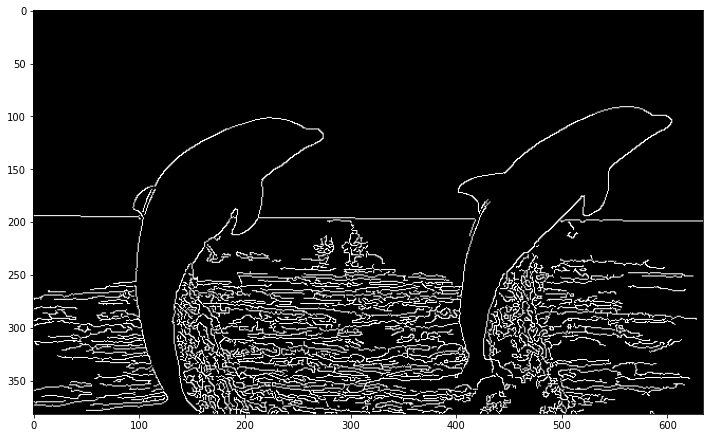

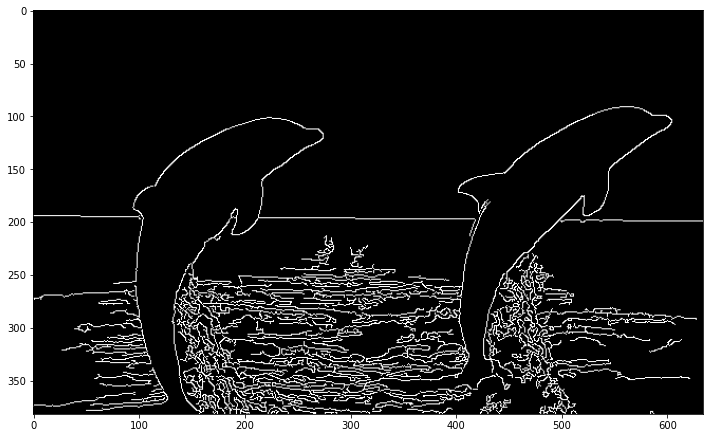

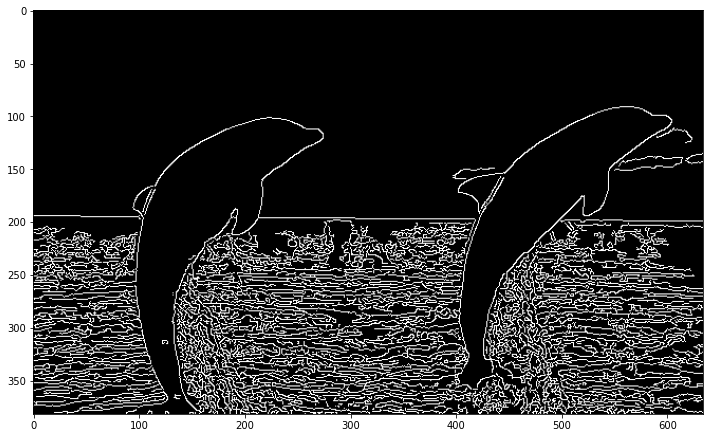

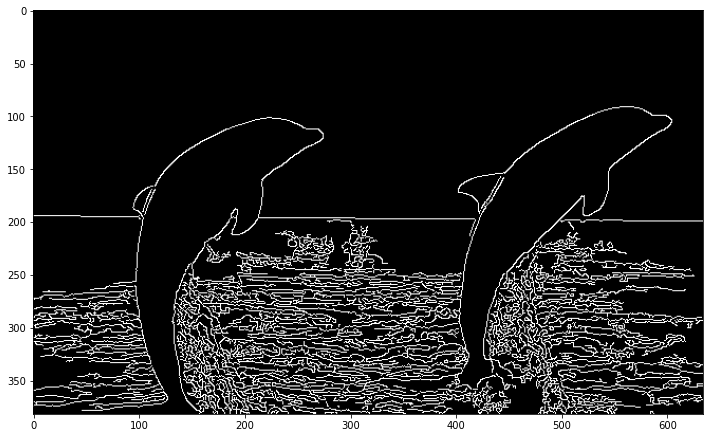

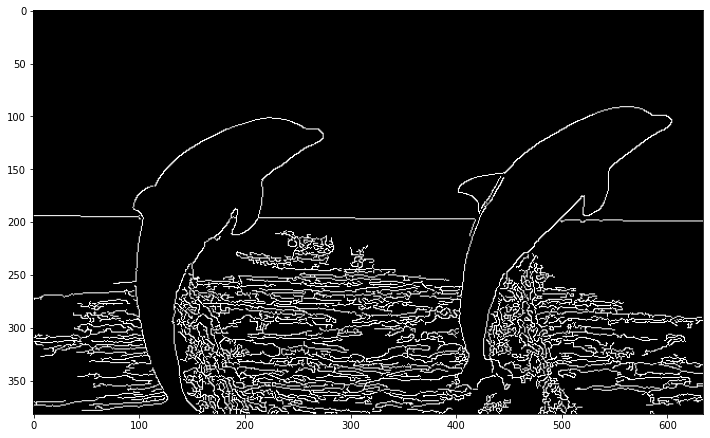

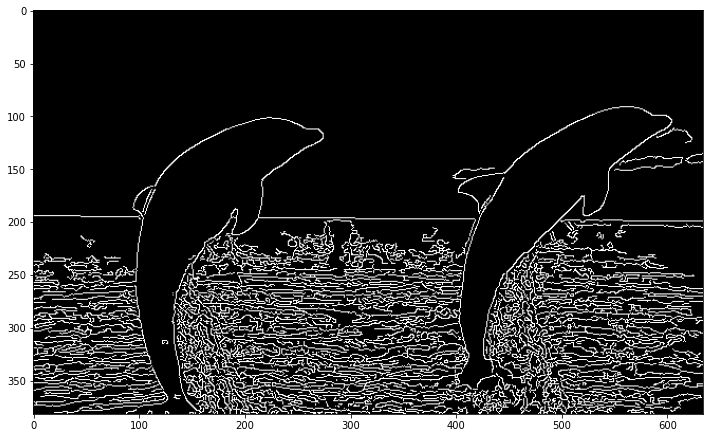

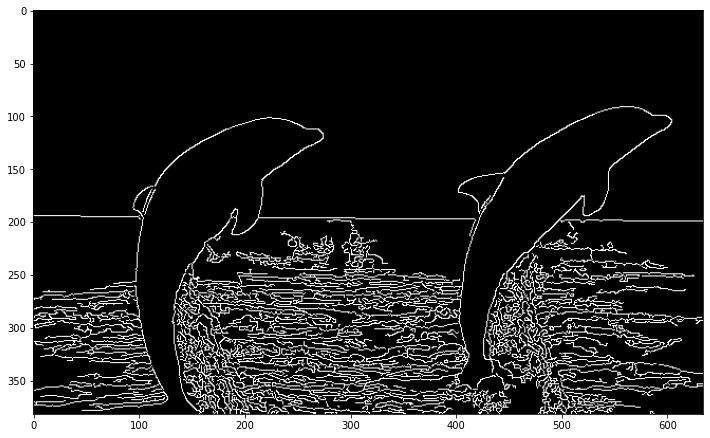

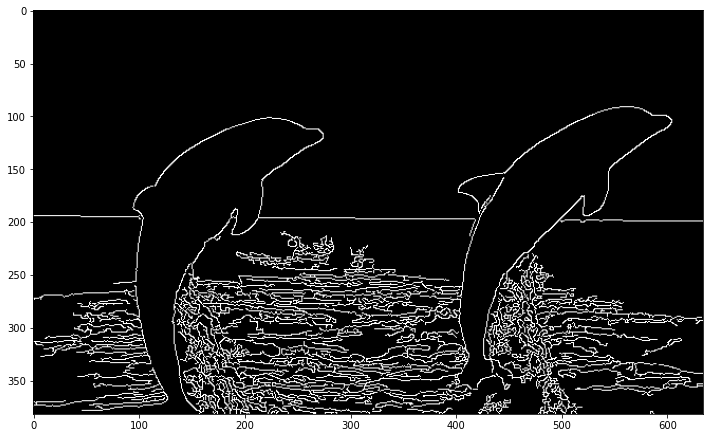

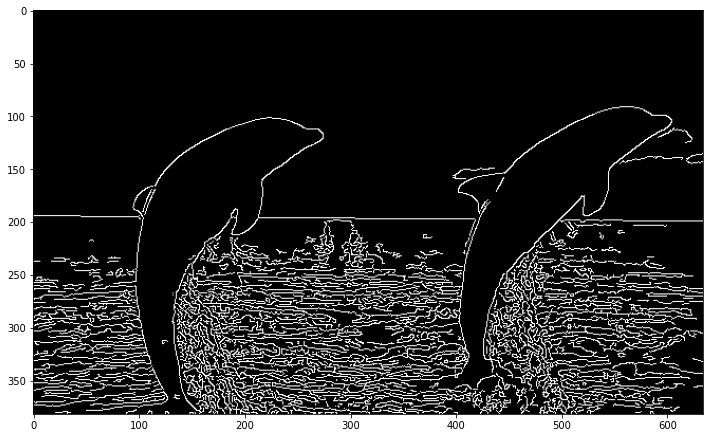

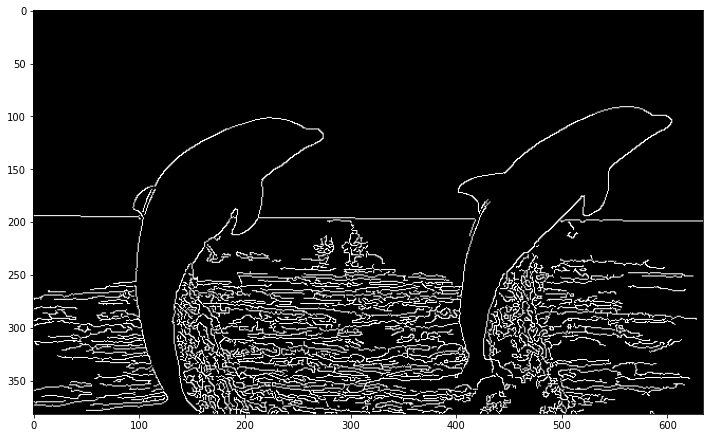

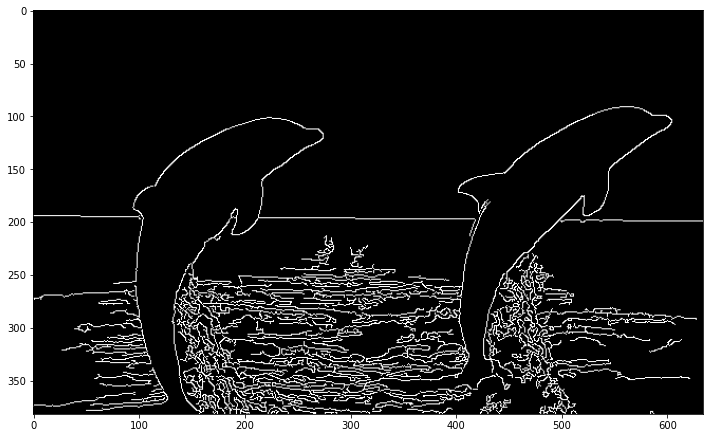

In [ ]:
#Load image
imageDolph = cv2.imread("dolphin.jpg")
imageDolphin = cv2.cvtColor(imageDolph, cv2.COLOR_BGR2GRAY)

#Create the blurred versions
blurredDolphin5x5 = cv2.GaussianBlur(imageDolphin, (5,5), 1)
blurredDolphin9x9 = cv2.GaussianBlur(imageDolphin, (9,9), 1)
blurredDolphin13x13 = cv2.GaussianBlur(imageDolphin, (13,13), 1)

#First we'll apply canny on the 5x5 gaussian blurred photo
image1 = cv2.Canny(blurredDolphin5x5, 10, 100)
image2 = cv2.Canny(blurredDolphin5x5, 10, 150)
image3 = cv2.Canny(blurredDolphin5x5, 10, 200)
image4 = cv2.Canny(blurredDolphin5x5, 30, 100)
image5 = cv2.Canny(blurredDolphin5x5, 30, 150)
image6 = cv2.Canny(blurredDolphin5x5, 30, 200)
image7 = cv2.Canny(blurredDolphin5x5, 50, 100)
image8 = cv2.Canny(blurredDolphin5x5, 50, 150)
image9 = cv2.Canny(blurredDolphin5x5, 50, 200)

#Now we apply canny onto the 9x9 gaussian blurred photo
image10 = cv2.Canny(blurredDolphin9x9, 10, 100)
image11 = cv2.Canny(blurredDolphin9x9, 10, 150)
image12 = cv2.Canny(blurredDolphin9x9, 10, 200)
image13 = cv2.Canny(blurredDolphin9x9, 30, 100)
image14 = cv2.Canny(blurredDolphin9x9, 30, 150)
image15 = cv2.Canny(blurredDolphin9x9, 30, 200)
image16 = cv2.Canny(blurredDolphin9x9, 50, 100)
image17 = cv2.Canny(blurredDolphin9x9, 50, 150)
image18 = cv2.Canny(blurredDolphin9x9, 50, 200)

#Now we apply canny onto the 13x13 image
image19 = cv2.Canny(blurredDolphin13x13, 10, 100)
image20 = cv2.Canny(blurredDolphin13x13, 10, 150)
image21 = cv2.Canny(blurredDolphin13x13, 10, 200)
image22 = cv2.Canny(blurredDolphin13x13, 30, 100)
image23 = cv2.Canny(blurredDolphin13x13, 30, 150)
image24 = cv2.Canny(blurredDolphin13x13, 30, 200)
image25 = cv2.Canny(blurredDolphin13x13, 50, 100)
image26 = cv2.Canny(blurredDolphin13x13, 50, 150)
image27 = cv2.Canny(blurredDolphin13x13, 50, 200)

#Print all 27 images
plt.figure(figsize=(12,16))
plt.imshow(image1, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image2, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image3, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image4, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image5, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image6, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image7, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image8, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image9, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image10, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image11, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image12, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image13, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image14, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image15, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image16, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image17, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image18, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image19, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image20, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image21, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image22, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image23, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image24, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image25, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image26, cmap='gray')

plt.figure(figsize=(12,16))
plt.imshow(image27, cmap='gray')


#Canny Edge Detection (Written Response)

####Briefly describe the 4 main steps of Canny Edge Detection

1. Apply a gausian blur filter to reduce the noise and then get the x and y derivatives. This can be done using the sobel horizontal and vertical edge filter once a gaussian blur has been applied

2. Find the magnitude and orientation of the gradiant. This allows us to see what direction the edge is pointing in. 

3. Perform non-maximum suppression in order to thin down the edges to a single pixel width. 

4. Perform the double thresholding and linking. Pixels which have an intensity above the max threshold are strong pixels. Pixels which have an intensity below the min threshold are removed from the image. Pixels which have an intensity inbetween the min and max threshold are marked as **weak pixels** and will be saved for the linking process. The linking process will analyze these weak pixels and determine which ones belong to the edges in the image and which ones are a result of noise. 

---

####Is there any relationship between the hyper parameters 

Yes there is. When our H is low, there is a higher percentage of pixels that are classified as **strong pixels** which can lead to some error if we capture some of the noise as strong pixels. Similarly, when our L is too high, we discount a large number of pixels that may have belonged to edges. The value of K did not have a large noticeable difference.

---
####Find a value of each hyperparameter such that only dolphin edges are detected

I tried this one but I could not figure out how to replicate the image in the assignment instructions


#Harris Corner Detection (Code)

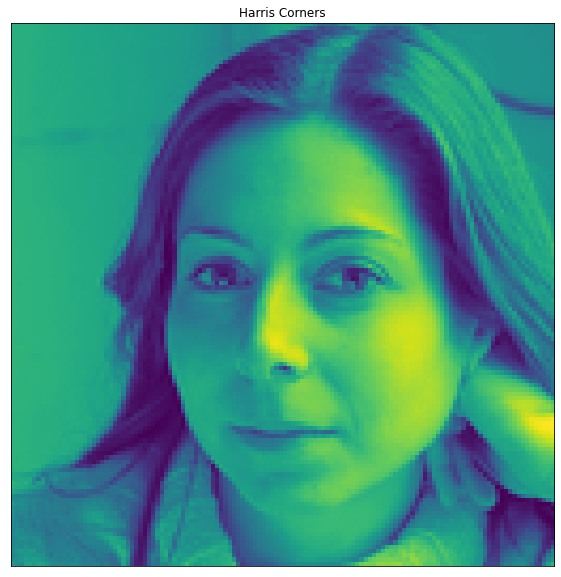

In [ ]:
#Load image
harImage = cv2.imread("42995.png")
harrisImage = cv2.cvtColor(harImage, cv2.COLOR_BGR2GRAY)

#Compute image derivatives
I_x = cv2.Sobel(harrisImage, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(harrisImage, cv2.CV_64F, 0, 1, ksize=3)

#Compute square of derivatives
IH1 = cv2.magnitude(I_x, I_y)

#Apply gaussian filtering on the output 
IH2 = cv2.GaussianBlur(IH1, (3,3), 1)

#I was pretty lost beyond this step in implementing harris corner detection using numpy.
#In order to answer the final questions I will use opencv to analyze the images
#SOME OF THE CODE IS BORROWED FROM THE TA FOR THE SOLE PURPOSE OF BEING ABLE TO ANALYZE THE PICTURES
img_disp = harrisImage.copy()
corners = cv2.cornerHarris(harrisImage, 2, 3, 0.05)
cv2.normalize(corners, corners, 0, 2, cv2.NORM_MINMAX)

thres = 2.1

# list all points higher than threshold
loc = np.where(corners >= thres)

# loop though points
for pt in zip(*loc[::-1]):
    # draw filled circle on each point
    # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
    cv2.circle(img_disp, pt, 15, (255,0,0), -1)

plt.figure(figsize=(10,10))
plt.subplot(111), plt.imshow(img_disp)
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()

#Harris Corner Detection (Written Response)

####Checkboard image

As the treshold is increased we notice less and less corners are detected. As the threshold increases we begin to only detect the corners near the cneter of the image. 

---

####Shapes Image

When the threshold is equal to 1, our entire image is red (the algorithm detects a corner at every spot). Until the threshold is greater than or equal to 1.6 we dont detect corners in the image. As we increase the threshold we detect less and less corners until at 2.1 we do not detect any more corners.

---

####42995.png

For our google thumbnail face we selected photo 42995.png. At a low threshold (i.e 1) the entire image was red. As the threshold increased we began to detect corners near the eyes and mouth of the user. Eventually we detected no corners once we reached a threshold of 2.1



#README

This code was written in google colab. The only libraries used are numpy, opencv, matplotlib and math.

In order to run the code the images must be in the same directory as the code. Depending on how you run this, you may need to update the image locations. In google colab you can just use the name of the photo if it exists in the current directory, on some other systems though you may need to add a "./" or something of that sort in front of the file name. If there any issues with loading the images I can be reached at anthony.johansen@mail.mcgill.ca. At the time of submission questions 1-4 were running succesfully.

For question 5 I borrowed code from the tutorial in order to be able to answer the last 3 questions as I could not get it working using solely numpy. I understand I will not get marks for the implementation aspect of course.